In [1]:
'''Libreria para cargar el dataset'''
import pandas as pd


In [2]:
'''Se carga el dataset'''
data = pd.read_csv("Dataset of Diabetes .csv")
'''Se muestra los 5 primeros datos'''
data.head()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [3]:
'''Ordena los valores de la clase'''
data['CLASS'].unique()

'''Ordena los valores de genero'''
data['Gender'].unique()

'''Remplazar etiquetas'''
a = {'F': 0 , 'f': 0, 'M': 1}

''''Binarizar el target (gender)'''
data['Gender'] = data['Gender'].map(a)

'''Remplazar etiquetas en clase por 0, 1 y 2'''
a1 = {'Y': 1 , 'Y ': 1, 'N': 0, 'N ':0, 'P':2}
data['CLASS'] = data['CLASS'].map(a1)
'''Comprobacion con las etiquetas asignadas'''
data.head()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [4]:
'''Dataset guardado en una variable'''
cara = ['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

'''Añadiendo las caracteristicas en una variable'''
X = data[cara] 
'''Variable independiente en este caso el target'''
y = data['CLASS'] 
'''Importacion de libreria para entrenar al modelo'''
from sklearn.model_selection import train_test_split
'''Entrenamiento del modelo 70% entrenamiento y 30% prueba'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [5]:
'''Se importa la libreria para el arbol de decision'''
from sklearn.tree import DecisionTreeClassifier
'''Se crea el arbol de decision'''
clf = DecisionTreeClassifier()
'''Se entrena el arbol de decision'''
clf = clf.fit(X_train,y_train)
'''Se realiza la prediccion del dataset'''
y_pred = clf.predict(X_test)

In [6]:
'''Librerias para las metricas'''
from sklearn import metrics
'''Evaluacion de los datos mediante accuracy, preccision y recall'''
'''Impresion del acurracy'''
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
'''Impresión del precision'''
print("Precision:", metrics.precision_score(y_test, y_pred,average='micro' ))
'''Impresion del recall'''
print("Recall:", metrics.recall_score(y_test, y_pred, average='micro'))

Accuracy: 0.97
Precision: 0.97
Recall: 0.97


In [7]:
'''Librería para realizar la matriz de confusion'''
from sklearn.metrics import confusion_matrix
'''Guardo en una variable la matriz de confusion'''
matriz=confusion_matrix(y_test, y_pred)
'''Se imprime la matriz de confusion de forma matriz'''
print(matriz)

[[ 29   3   0]
 [  3 249   0]
 [  2   1  13]]


<AxesSubplot:>

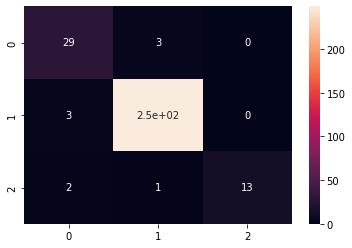

In [8]:
'''Darle las caracteristicas de la matriz de confusion'''
df_matriz = confusion_matrix(y_test, y_pred, labels=clf.classes_)
'''Modulo para crear la matriz'''
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
'''Se configura las etiquetas de la matriz de confusion'''
matriz = ConfusionMatrixDisplay(confusion_matrix=df_matriz, display_labels=clf.classes_)
'''Se importa la libreria graficar la matriz'''
import matplotlib.pyplot as plt
'''Se crea en una sola matriz'''
matriz.plot()
'''Se grafica la nueva matriz de confusion'''
plt.show()

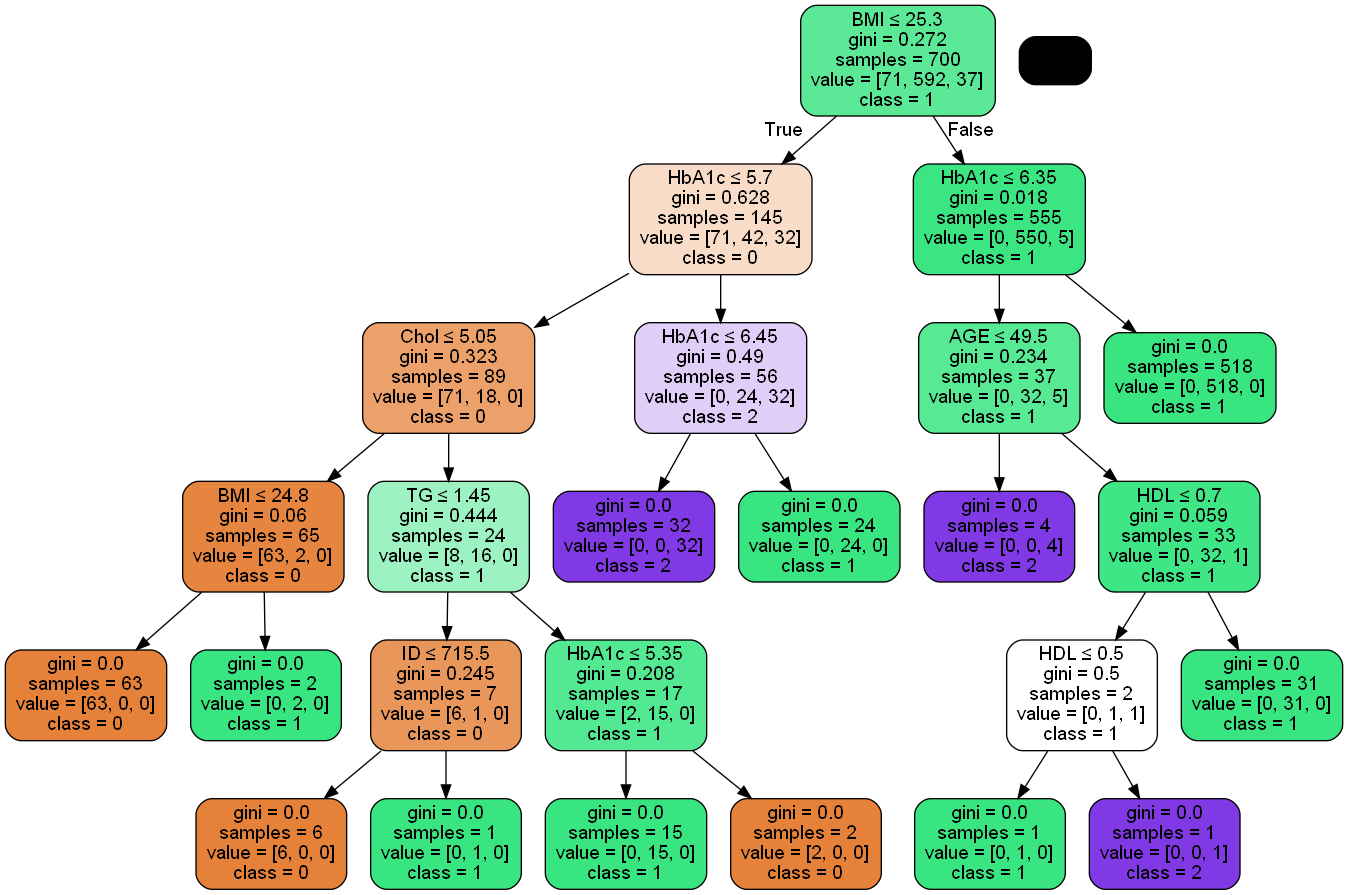

In [9]:
'''Importacion de libreria para graficar'''
from sklearn.tree import export_graphviz
'''Para agregar al buffer la libreria'''
from six import StringIO 
'''Modulo para para crear la imagen'''
from IPython.display import Image  
'''Importacion para el modulo para graficar'''
import pydotplus
'''Asignacion para agregar a la memoria'''
tree = StringIO()
'''Se añade caracteristicas a la grafica del arbol'''
export_graphviz(clf , out_file=tree, filled=True, rounded=True, special_characters=True, feature_names = cara, class_names=['0','1','2'])
'''Se evalua el arbol'''
graph = pydotplus.graph_from_dot_data(tree.getvalue())  
'''Se grafica el arbol '''
graph.write_png('arbol.png')
'''Se crea la imagen del arbol de decision'''
Image(graph.create_png())

In [10]:
'''Se crear el arbol de decision'''
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

'''Se entrena el arbol de decision'''
clf = clf.fit(X_train,y_train)

'''Se realiza la prediccion del dataset'''
y_pred = clf.predict(X_test)

'''Evaluacion de los datos mediante accuracy, preccision y recall'''
'''Impresion del acurracy'''
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
'''Impresión del precision'''
print("Precision:", metrics.precision_score(y_test, y_pred,average='micro' ))
'''Impresion del recall'''
print("Recall:", metrics.recall_score(y_test, y_pred, average='micro'))

Accuracy: 0.9533333333333334
Precision: 0.9533333333333334
Recall: 0.9533333333333334


In [11]:
'''Librería para realizar la matriz de confusion con el arbol acortado'''
from sklearn.metrics import confusion_matrix
'''Guardo en una variable la matriz de confusion con el arbol acortado'''
matriz=confusion_matrix(y_test, y_pred)
'''Se imprime la matriz de confusion de forma matriz con el arbol acortado'''
print(matriz)

[[ 26   6   0]
 [  8 244   0]
 [  0   0  16]]


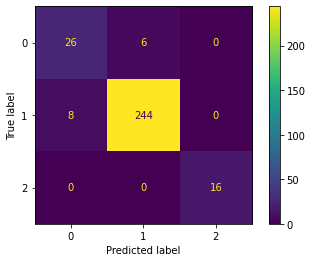

In [12]:
'''Darle las caracteristicas de la matriz de confusion'''
df_matriz = confusion_matrix(y_test, y_pred, labels=clf.classes_)
'''Modulo para crear la matriz'''
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
'''Se configura las etiquetas de la matriz de confusion'''
matriz = ConfusionMatrixDisplay(confusion_matrix=df_matriz, display_labels=clf.classes_)
'''Se importa la libreria graficar la matriz'''
import matplotlib.pyplot as plt
'''Se crea en una sola matriz'''
matriz.plot()
'''Se grafica la nueva matriz de confusion con el arbol acortado'''
plt.show()